In [2]:
from squirrels import SquirrelsProject
import matplotlib.pyplot as plt

sqrl = SquirrelsProject()

In [3]:
df = await sqrl.dataset("simulations", user=None)
df

,trial_number,value_if_refinance_house,value_if_pay_down_house,perc_diff
0,1,3666.983,2350.619,56.001
1,2,931.696,1086.476,-14.246
2,3,1231.312,2098.319,-41.319
3,4,3055.463,2506.859,21.884
4,5,2979.344,1711.594,74.068
...,...,...,...,...
995,996,7568.602,4585.231,65.065
996,997,616.493,854.631,-27.864
997,998,909.633,1566.601,-41.936
998,999,1793.518,1807.039,-0.748


Text(0, 0.5, 'Stock Value if Refinance House (in $1000s)')

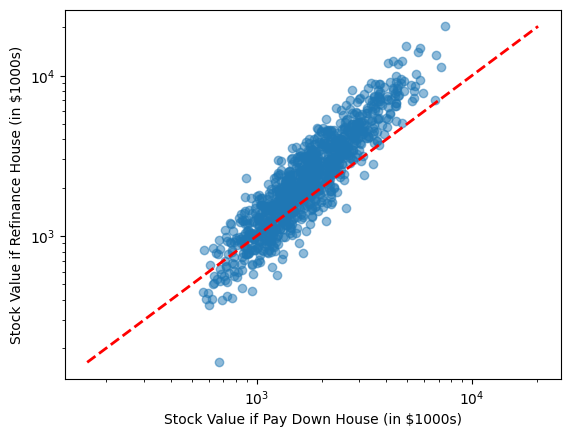

In [11]:
plt.scatter(df["value_if_pay_down_house"], df["value_if_refinance_house"], alpha=0.5)

min_val = min(df['value_if_pay_down_house'].min(), df['value_if_refinance_house'].min())
max_val = max(df['value_if_pay_down_house'].max(), df['value_if_refinance_house'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stock Value if Pay Down House (in $1000s)')
plt.ylabel('Stock Value if Refinance House (in $1000s)')

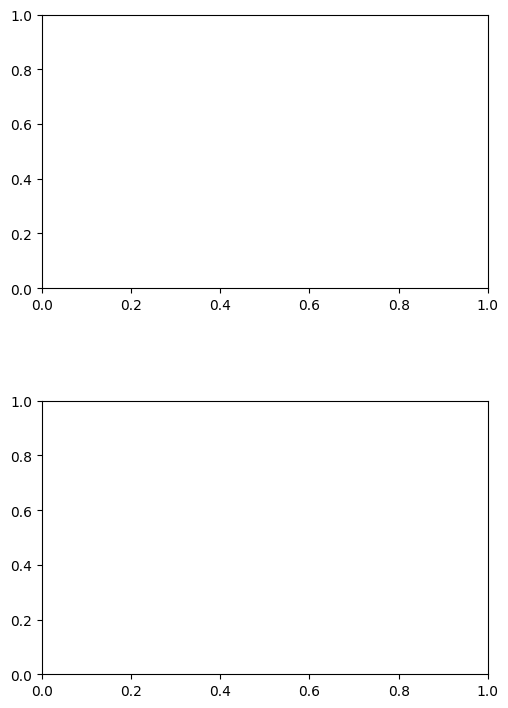

In [31]:
fig, (ax0, ax1) = plt.subplots(2, figsize=(6, 8))
fig.tight_layout(pad=4, h_pad=6)

def add_quartile_labels(ax, df):
    for i, column in enumerate(df.columns):
        quartiles = df[column].quantile([0, 0.25, 0.5, 0.75, 1])
        for j, q in enumerate(['Min', 'Q1', 'Median', 'Q3', 'Max']):
            ax.text(i+1, quartiles.iloc[j], f'{q}: {quartiles.iloc[j]:.3f}', 
                    horizontalalignment='center', verticalalignment='center',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

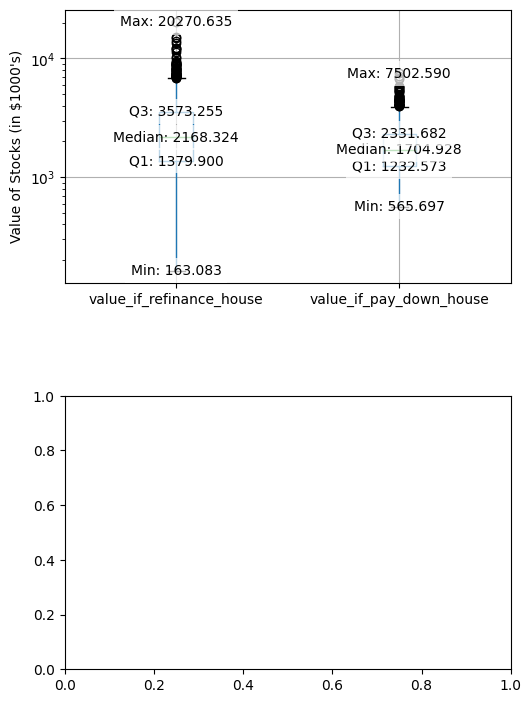

In [32]:

df[["value_if_refinance_house", "value_if_pay_down_house"]].boxplot(ax=ax0)

add_quartile_labels(ax0, df[["value_if_refinance_house", "value_if_pay_down_house"]])

ax0.set_yscale('log')
ax0.set_ylabel("Value of Stocks (in $1000's)")

fig

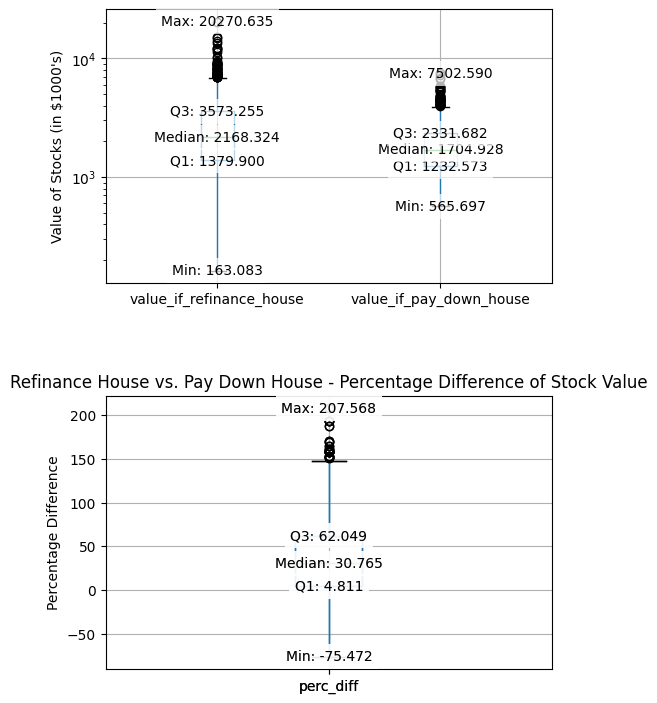

In [34]:
df[["perc_diff"]].boxplot(ax=ax1)

add_quartile_labels(ax1, df[["perc_diff"]])

ax1.set_title('Refinance House vs. Pay Down House - Percentage Difference of Stock Value')
ax1.set_ylabel('Percentage Difference')

fig